In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

Tratamento dos dados

In [44]:
df = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool (4).csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [45]:
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


TOP 5 Players with most points


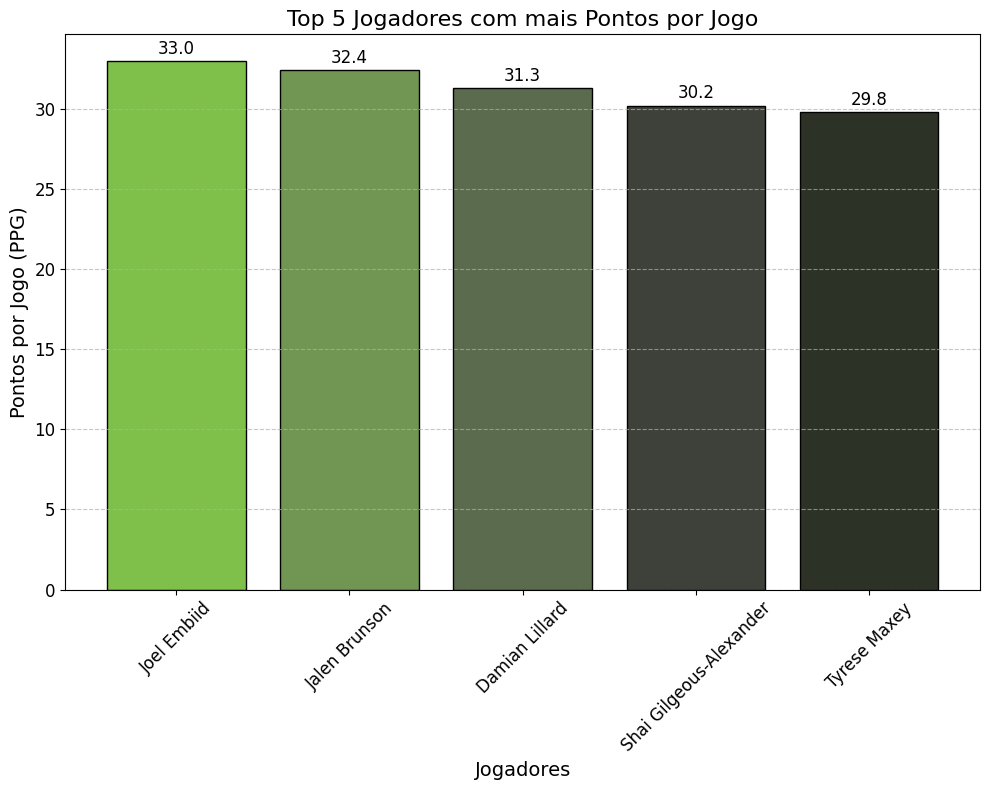

In [46]:
top_5_ppg = df.nlargest(5, 'PPG')
Top5Points = top_5_ppg['PPG'].values
names = top_5_ppg['NAME'].values
colors = ['#7FC04A', '#719653', '#5B6B4D', '#3D4139', '#2C3326']

plt.figure(figsize=(10,8))
bars = plt.bar(names, Top5Points, color=colors, edgecolor='black')

plt.xlabel('Jogadores', fontsize=14)
plt.ylabel('Pontos por Jogo (PPG)', fontsize=14)
plt.title('Top 5 Jogadores com mais Pontos por Jogo', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.2, round(yval, 1), ha='center', va='bottom', fontsize=12, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pontos por jogo de cada time

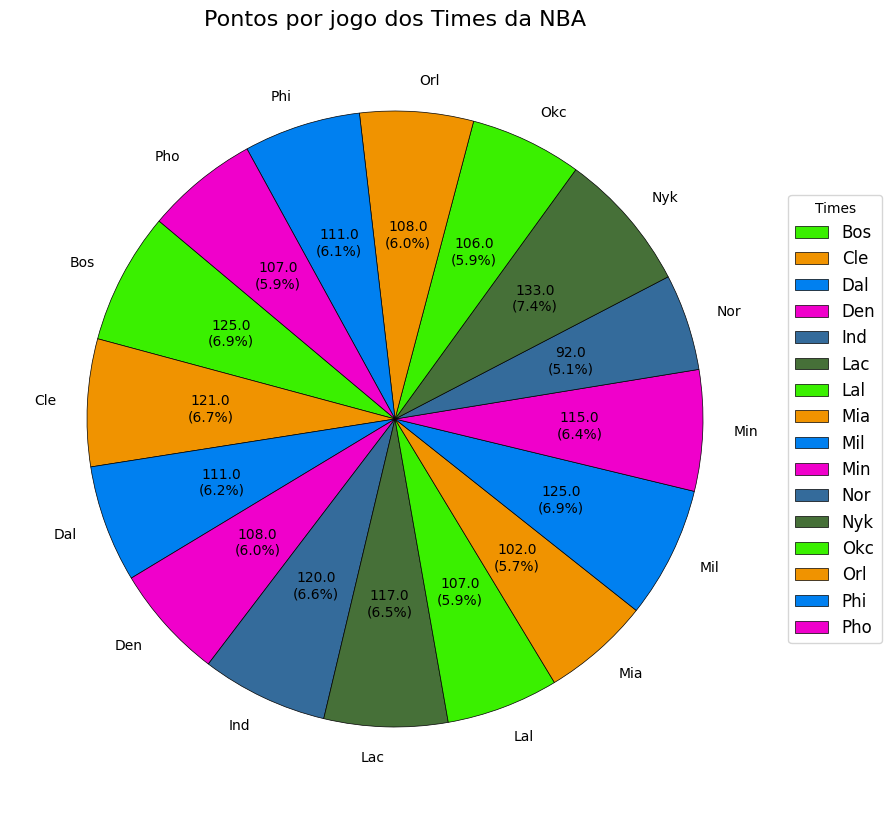

In [47]:
team_points = df.groupby('TEAM')['PPG'].sum().reset_index()
team_points = team_points.rename(columns={'PPG': 'Total Points'})
total_points = team_points['Total Points'].values



colors = ['#3AF000', '#F09300', '#0080F0', '#F000CB','#346B9B','#467038']

def format_label(pct):
    absolute_value = float(round(pct/100.*team_points['Total Points'].sum(), 0))
    return f'{absolute_value}\n({pct:.1f}%)'

# Criar o gráfico de pizza
plt.figure(figsize=(10, 10))  # Ajustar o tamanho do gráfico
plt.pie(total_points, labels=team_points['TEAM'].values, startangle=140, colors=colors,autopct=format_label,wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'})

plt.title('Pontos por jogo dos Times da NBA', fontsize=16)
plt.legend(title="Times", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.show()

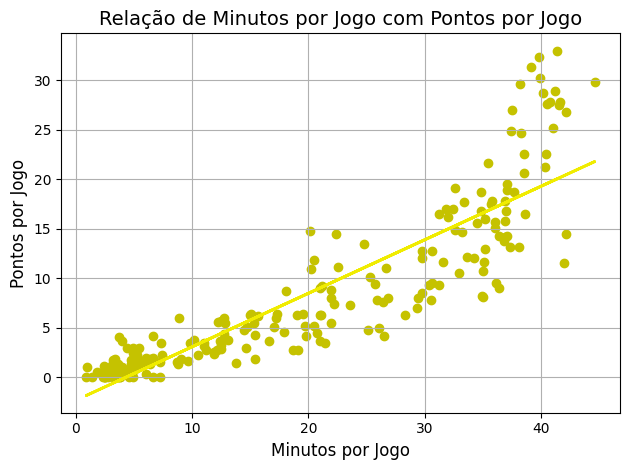

In [48]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(df['MPG'], df['PPG'])

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, df['MPG']))

plt.scatter(df['MPG'], df['PPG'], color='#C5C200', marker='o', linewidth=1, label='Pontos por Jogo')
plt.plot(df['MPG'], mymodel, color='#F0EC00', linewidth=2)

plt.title('Relação de Minutos por Jogo com Pontos por Jogo', fontsize=14)
plt.xlabel('Minutos por Jogo', fontsize=12)
plt.ylabel('Pontos por Jogo', fontsize=12)
plt.grid(True)


plt.tight_layout()
plt.show()

In [49]:
def categorize_player(ppg):
    if ppg >= 25:
        return 'All-Star'
    elif ppg >= 15:
        return 'Bom'
    elif ppg >= 5:
        return 'Mediano'
    else:
        return 'Ruim'

# Aplicar a função para criar a coluna 'Category'
df['Category'] = df['PPG'].apply(categorize_player)

print(df)

     RANK                     NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
0       1              Joel Embiid  Phi   C  30.2   6  41.4  35.7  15.8   78   
1       2            Jalen Brunson  Nyk   G  27.8  13  39.8  36.4   9.3  120   
2       3           Damian Lillard  Mil   G  33.9   4  39.1  31.4  10.0   38   
3       4  Shai Gilgeous-Alexander  Okc   G  25.9  10  39.9  32.3   8.9   81   
4       5             Tyrese Maxey  Phi   G  23.6   6  44.6  28.1   8.6   28   
..    ...                      ...  ...  ..   ...  ..   ...   ...   ...  ...   
208   209              David Roddy  Pho   F  23.2   2   1.4   0.0   0.0    0   
209   210           Gordon Hayward  Okc   F  34.2   7   6.6   3.0   0.0    0   
210   211           Thaddeus Young  Pho   F  36.0   1   3.6   0.0   0.0    0   
211   212              T.J. Warren  Min   F  30.8   3   3.8   8.1   0.0    0   
212   213            Isaiah Thomas  Pho   G  35.3   1   3.6  39.1  33.3    0   

     ...  SPG  BPG  TPG   P+R   P+A  P+

Aprendizado de máquina

Regressão Polimonial

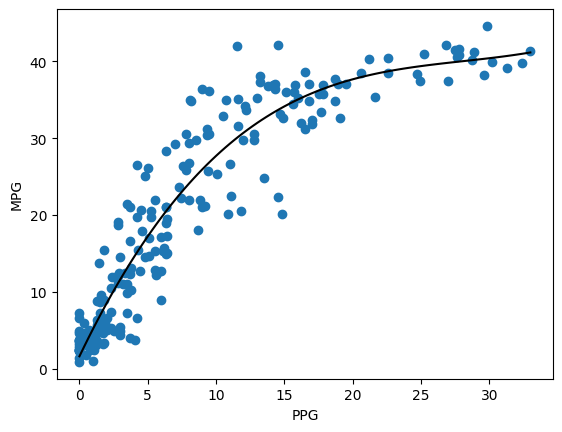

0.8946883180560696


In [50]:
import numpy
from sklearn.metrics import r2_score
df.columns

x = df['PPG']
y = df['MPG']

mymodel = numpy.poly1d(numpy.polyfit(x,y,3))

myline = numpy.linspace(0, 33, 100)

plt.scatter(x, y)
plt.xlabel('PPG')
plt.ylabel('MPG')
plt.plot(myline, mymodel(myline), color= 'Black')
plt.show()

print(r2_score(y, mymodel(x)))

Regressão Múltipla

In [51]:
from sklearn import linear_model

X = df[['MPG','2PA','3PA','RPG', 'APG', 'SPG', 'BPG']]
y = df['PPG']


regr = linear_model.LinearRegression()
regr.fit(X,y)

predictPPG = regr.predict([[38, 85, 60, 7.9, 6.7, 1.2, 0.6]])

print(predictPPG)

[21.62362226]


c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Train/Test

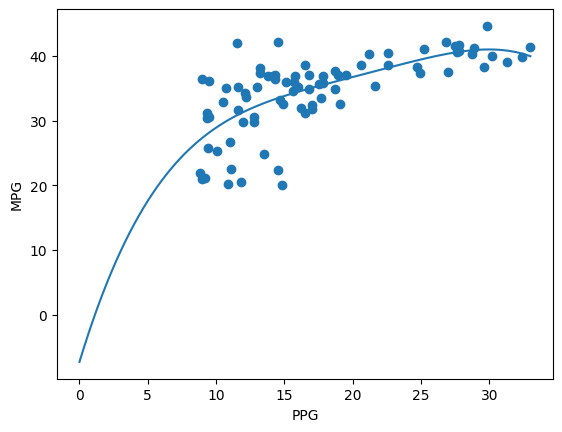

0.46894787883942657


In [52]:

x = df['PPG']
y = df['MPG']

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 33, 100)

plt.scatter(train_x,train_y)
plt.plot(myline,mymodel(myline))
plt.xlabel('PPG')
plt.ylabel('MPG')
plt.show()

r2 = r2_score(train_y, mymodel(train_x))
print(r2)

[Text(0.5, 0.75, 'PPG <= 15.0\ngini = 0.322\nsamples = 213\nvalue = [170, 43]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 170\nvalue = [170, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.625, 0.5, '  False')]

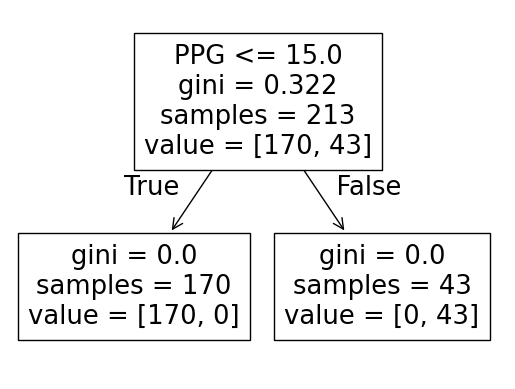

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df.columns

d = {'All-Star': 1,'Bom': 1, 'Mediano': 0, 'Ruim': 0}
df['CategoryNew'] = df['Category'].map(d)

relacoes = ['PPG', 'RPG', 'APG','SPG', 'BPG']

X = df[relacoes]
y = df['CategoryNew']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=relacoes)

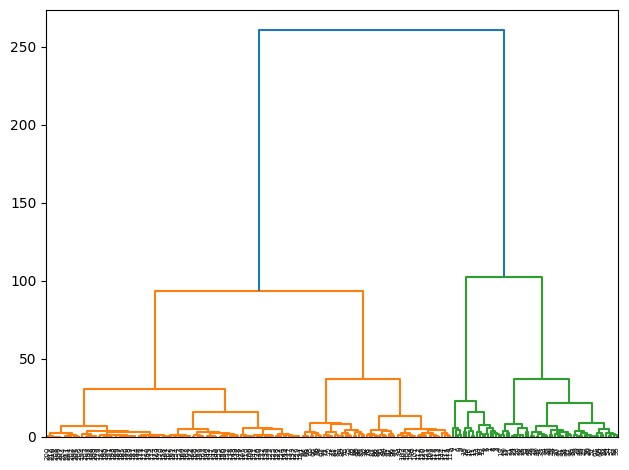

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

x = df['PPG']
y = df['P+R+A']

data = list(zip(x,y))

linkage_data = linkage(data, method='ward',
metric='euclidean')
dendrogram(linkage_data)

plt.tight_layout()
plt.show()



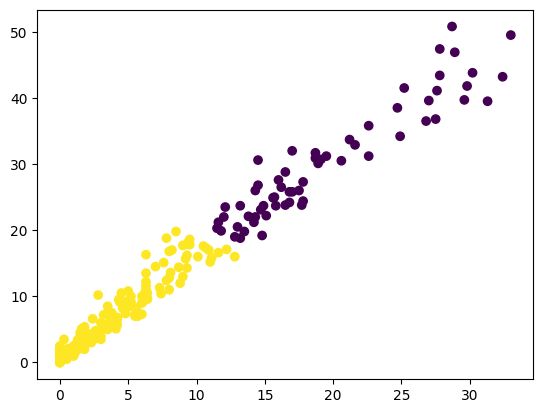

In [55]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x,y, c=labels)
plt.show()

In [56]:
from sklearn import linear_model

x = df[['PPG']]
y = df['CategoryNew']

logr = linear_model.LinearRegression()
logr.fit(x,y)

def logit2prob(logr, x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, x))

          PPG
0    0.767011
1    0.762654
2    0.754523
3    0.746205
4    0.743135
..        ...
208  0.464890
209  0.464890
210  0.464890
211  0.464890
212  0.464890

[213 rows x 1 columns]


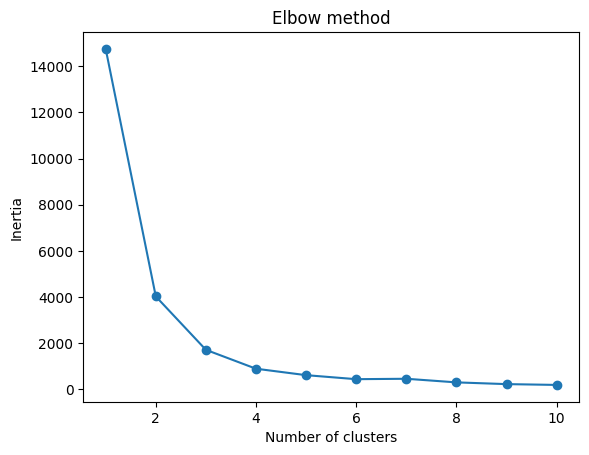

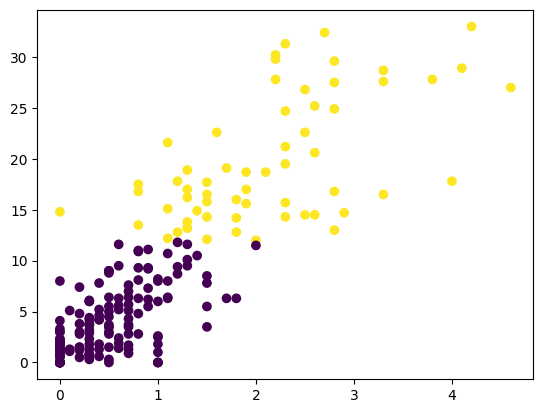

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg',
       'Category', 'CategoryNew'],
      dtype='object')

In [57]:
from sklearn.cluster import KMeans

x = df['TPG']
y = df['PPG']

data = list(zip(x,y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

df.columns

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = df[relacoes]
y = df['3PA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 0.9874213836477987
Test data accuracy: 0.07407407407407407


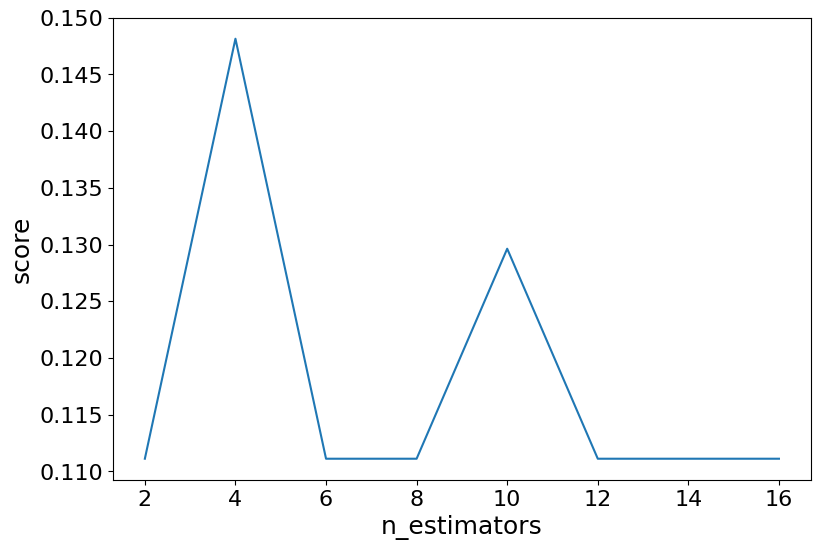

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg',
       'Category', 'CategoryNew'],
      dtype='object')

In [66]:
from sklearn.ensemble import BaggingClassifier

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

  
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)


    clf.fit(X_train, y_train)


    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)


plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)


plt.show()
df.columns


In [60]:
oob_model = BaggingClassifier(n_estimators = 4, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9685534591194969


c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[Text(0.5087398830935251, 0.9722222222222222, 'APG <= 0.55\ngini = 0.961\nsamples = 97\nvalue = [15.0, 11.0, 14.0, 7.0, 3.0, 7.0, 1.0, 3.0, 2.0, 0.0\n3.0, 5.0, 3.0, 2.0, 0.0, 2.0, 3.0, 0.0, 0.0, 2.0\n7.0, 5.0, 0.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0.0\n2.0, 3.0, 1.0, 5.0, 1.0, 0.0, 0.0, 2.0, 0.0, 3.0\n0.0, 1.0, 4.0, 4.0, 1.0, 0.0, 1.0, 0.0, 0.0, 4.0\n2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 4.0, 2.0\n1.0, 2.0, 2.0, 4.0]'),
 Text(0.21942446043165467, 0.9166666666666666, 'PPG <= 5.85\ngini = 0.849\nsamples = 32\nvalue = [10.0, 10.0, 10.0, 7.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0\n0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0\n0.0, 0.0, 0.0, 0.0]'),
 Text(0.3640821717625899, 0.9444444444444444, 'True  '),
 Text(0.1906474820143885, 0.8611111111111112, 'BPG <= 0.55\ngini = 0.834\nsamples = 29\nvalue = 

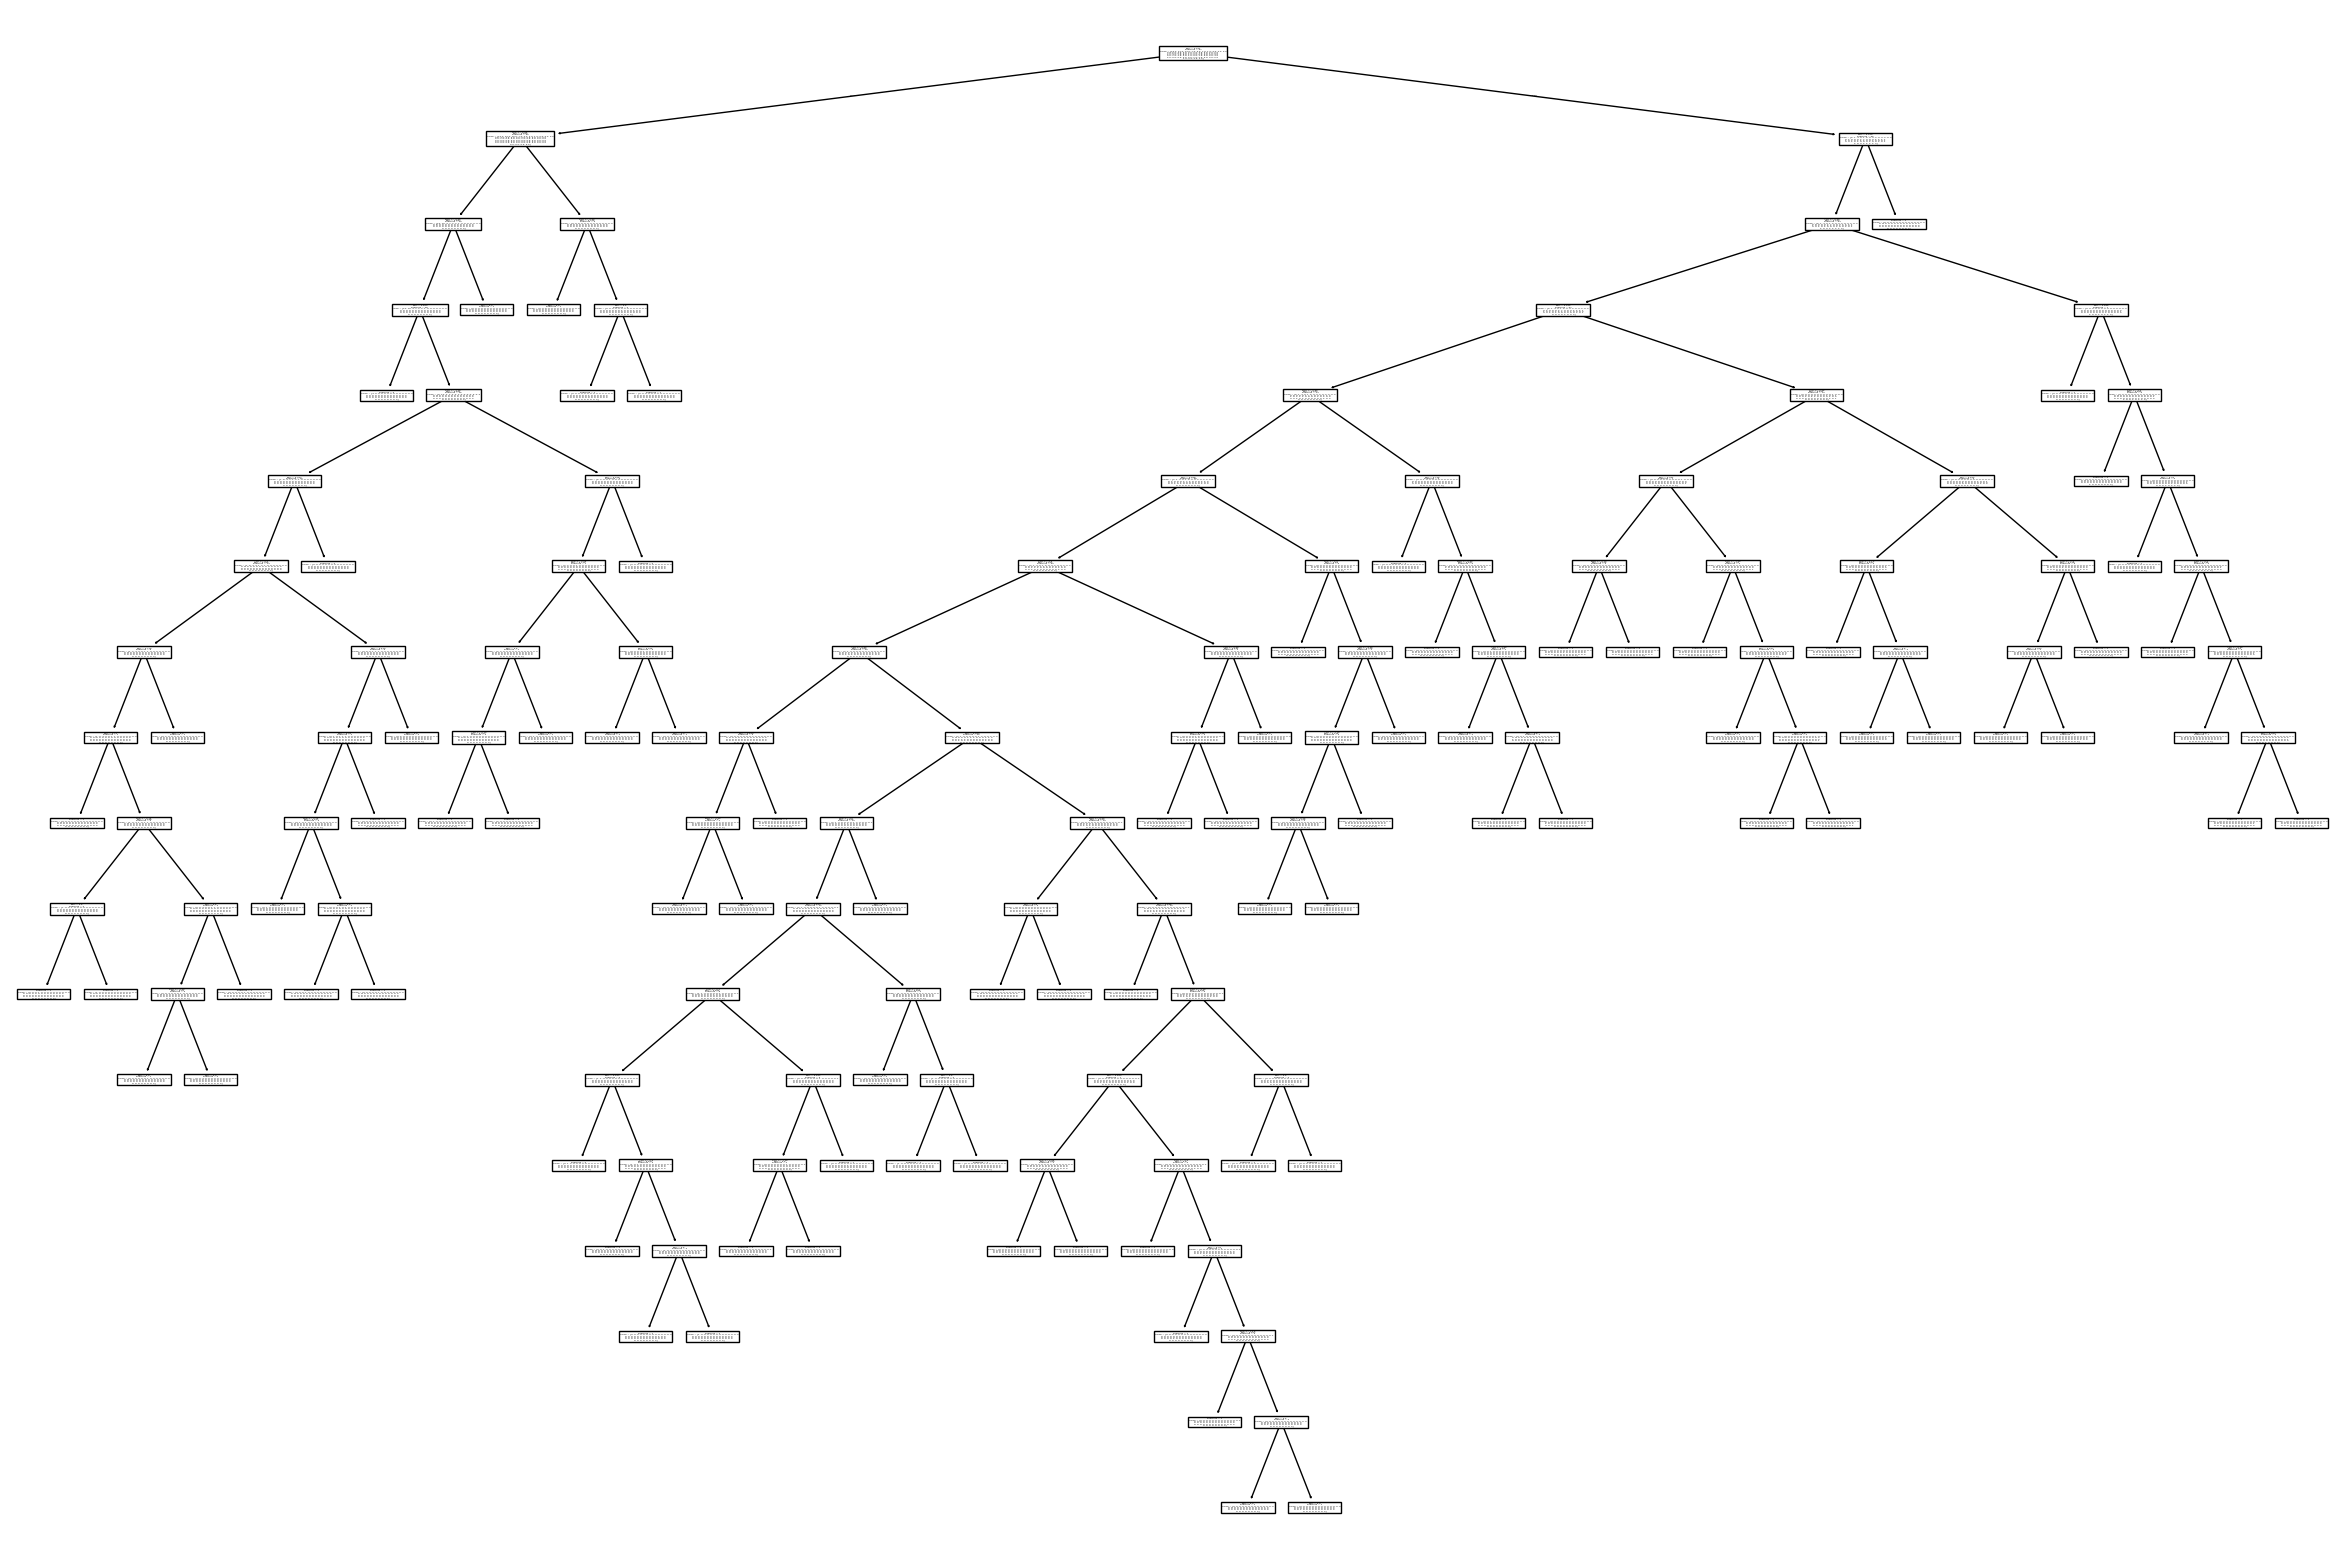

In [67]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)